# Task_03_DS - Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load and Explore the Dataset

In [95]:
path = "bank-additional/bank-additional/bank-additional-full.csv"

In [96]:
bank = pd.read_csv(path, sep=";")
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [97]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [98]:
bank.rename(columns={'y':'Subsribed_Term_deposit'},inplace=True)
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Subsribed_Term_deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [99]:
print(bank.info())
print(bank.head())
print(bank.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     41188 non-null  int64  
 1   job                     41188 non-null  object 
 2   marital                 41188 non-null  object 
 3   education               41188 non-null  object 
 4   default                 41188 non-null  object 
 5   housing                 41188 non-null  object 
 6   loan                    41188 non-null  object 
 7   contact                 41188 non-null  object 
 8   month                   41188 non-null  object 
 9   day_of_week             41188 non-null  object 
 10  duration                41188 non-null  int64  
 11  campaign                41188 non-null  int64  
 12  pdays                   41188 non-null  int64  
 13  previous                41188 non-null  int64  
 14  poutcome                41188 non-null

### Preprocess the Data

In [100]:
print(bank.isnull().sum())

age                       0
job                       0
marital                   0
education                 0
default                   0
housing                   0
loan                      0
contact                   0
month                     0
day_of_week               0
duration                  0
campaign                  0
pdays                     0
previous                  0
poutcome                  0
emp.var.rate              0
cons.price.idx            0
cons.conf.idx             0
euribor3m                 0
nr.employed               0
Subsribed_Term_deposit    0
dtype: int64


In [101]:
bank.dtypes

age                         int64
job                        object
marital                    object
education                  object
default                    object
housing                    object
loan                       object
contact                    object
month                      object
day_of_week                object
duration                    int64
campaign                    int64
pdays                       int64
previous                    int64
poutcome                   object
emp.var.rate              float64
cons.price.idx            float64
cons.conf.idx             float64
euribor3m                 float64
nr.employed               float64
Subsribed_Term_deposit     object
dtype: object

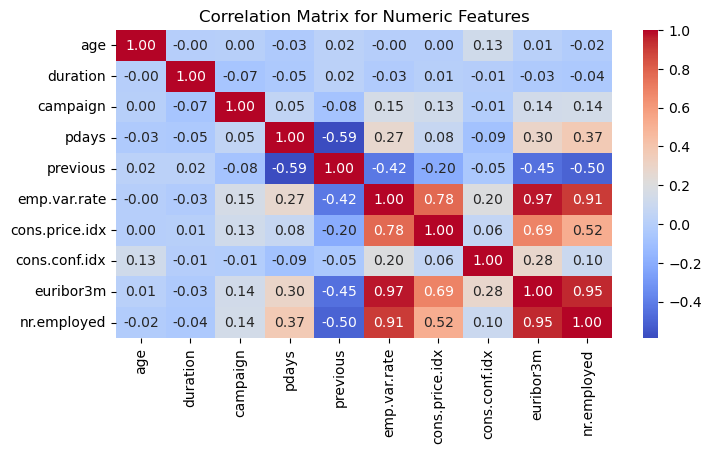

In [102]:
numeric_columns = bank.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(8,4))
sns.heatmap(bank[numeric_columns].corr(),annot = True , cmap = "coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

### Label Encoding

In [103]:
label_encoder = LabelEncoder()
categorical_columns = bank.select_dtypes(include=['object']).columns
for column in categorical_columns:
    bank[column]= label_encoder.fit_transform(bank[column])
bank.dtypes

age                         int64
job                         int32
marital                     int32
education                   int32
default                     int32
housing                     int32
loan                        int32
contact                     int32
month                       int32
day_of_week                 int32
duration                    int64
campaign                    int64
pdays                       int64
previous                    int64
poutcome                    int32
emp.var.rate              float64
cons.price.idx            float64
cons.conf.idx             float64
euribor3m                 float64
nr.employed               float64
Subsribed_Term_deposit      int32
dtype: object

In [104]:
corr = bank.corr()
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]
print(high_corr.head(10))

euribor3m       emp.var.rate      0.972245
emp.var.rate    euribor3m         0.972245
nr.employed     euribor3m         0.945154
euribor3m       nr.employed       0.945154
nr.employed     emp.var.rate      0.906970
emp.var.rate    nr.employed       0.906970
                cons.price.idx    0.775334
cons.price.idx  emp.var.rate      0.775334
euribor3m       cons.price.idx    0.688230
cons.price.idx  euribor3m         0.688230
dtype: float64


In [105]:
target_corr = corr['Subsribed_Term_deposit'].abs().sort_values()
print(target_corr.head(10))

loan             0.004909
month            0.006065
housing          0.011552
day_of_week      0.015967
job              0.025122
age              0.030399
marital          0.046203
cons.conf.idx    0.054878
education        0.057799
campaign         0.066357
Name: Subsribed_Term_deposit, dtype: float64


In [106]:
features_to_drop = ['euribor3m','emp.var.rate','nr.employed']  # removing highly correlated features
bank = bank.drop(columns=features_to_drop)

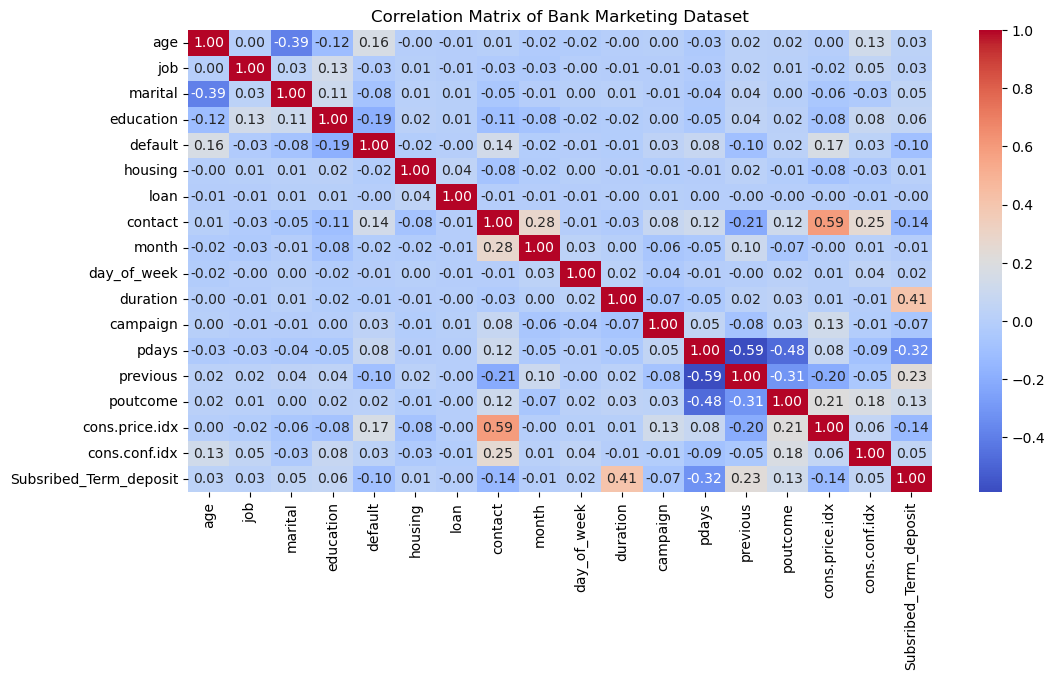

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(bank.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix of Bank Marketing Dataset")
plt.show()

In [109]:
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,Subsribed_Term_deposit
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,93.994,-36.4,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,93.994,-36.4,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,93.994,-36.4,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,93.994,-36.4,0


## Build and Train the Decision Tree Classifier

In [110]:
x = bank.drop('Subsribed_Term_deposit',axis=1)
y = bank['Subsribed_Term_deposit']

In [111]:
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [112]:
clf = DecisionTreeClassifier(random_state=42,max_depth=5)
clf

DecisionTreeClassifier(max_depth=5, random_state=42)

In [113]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

### Model Evaluation

In [114]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy: 0.9095654285020636

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238


Confusion Matrix:
 [[7117  186]
 [ 559  376]]


### Visualization of the Decision Tree

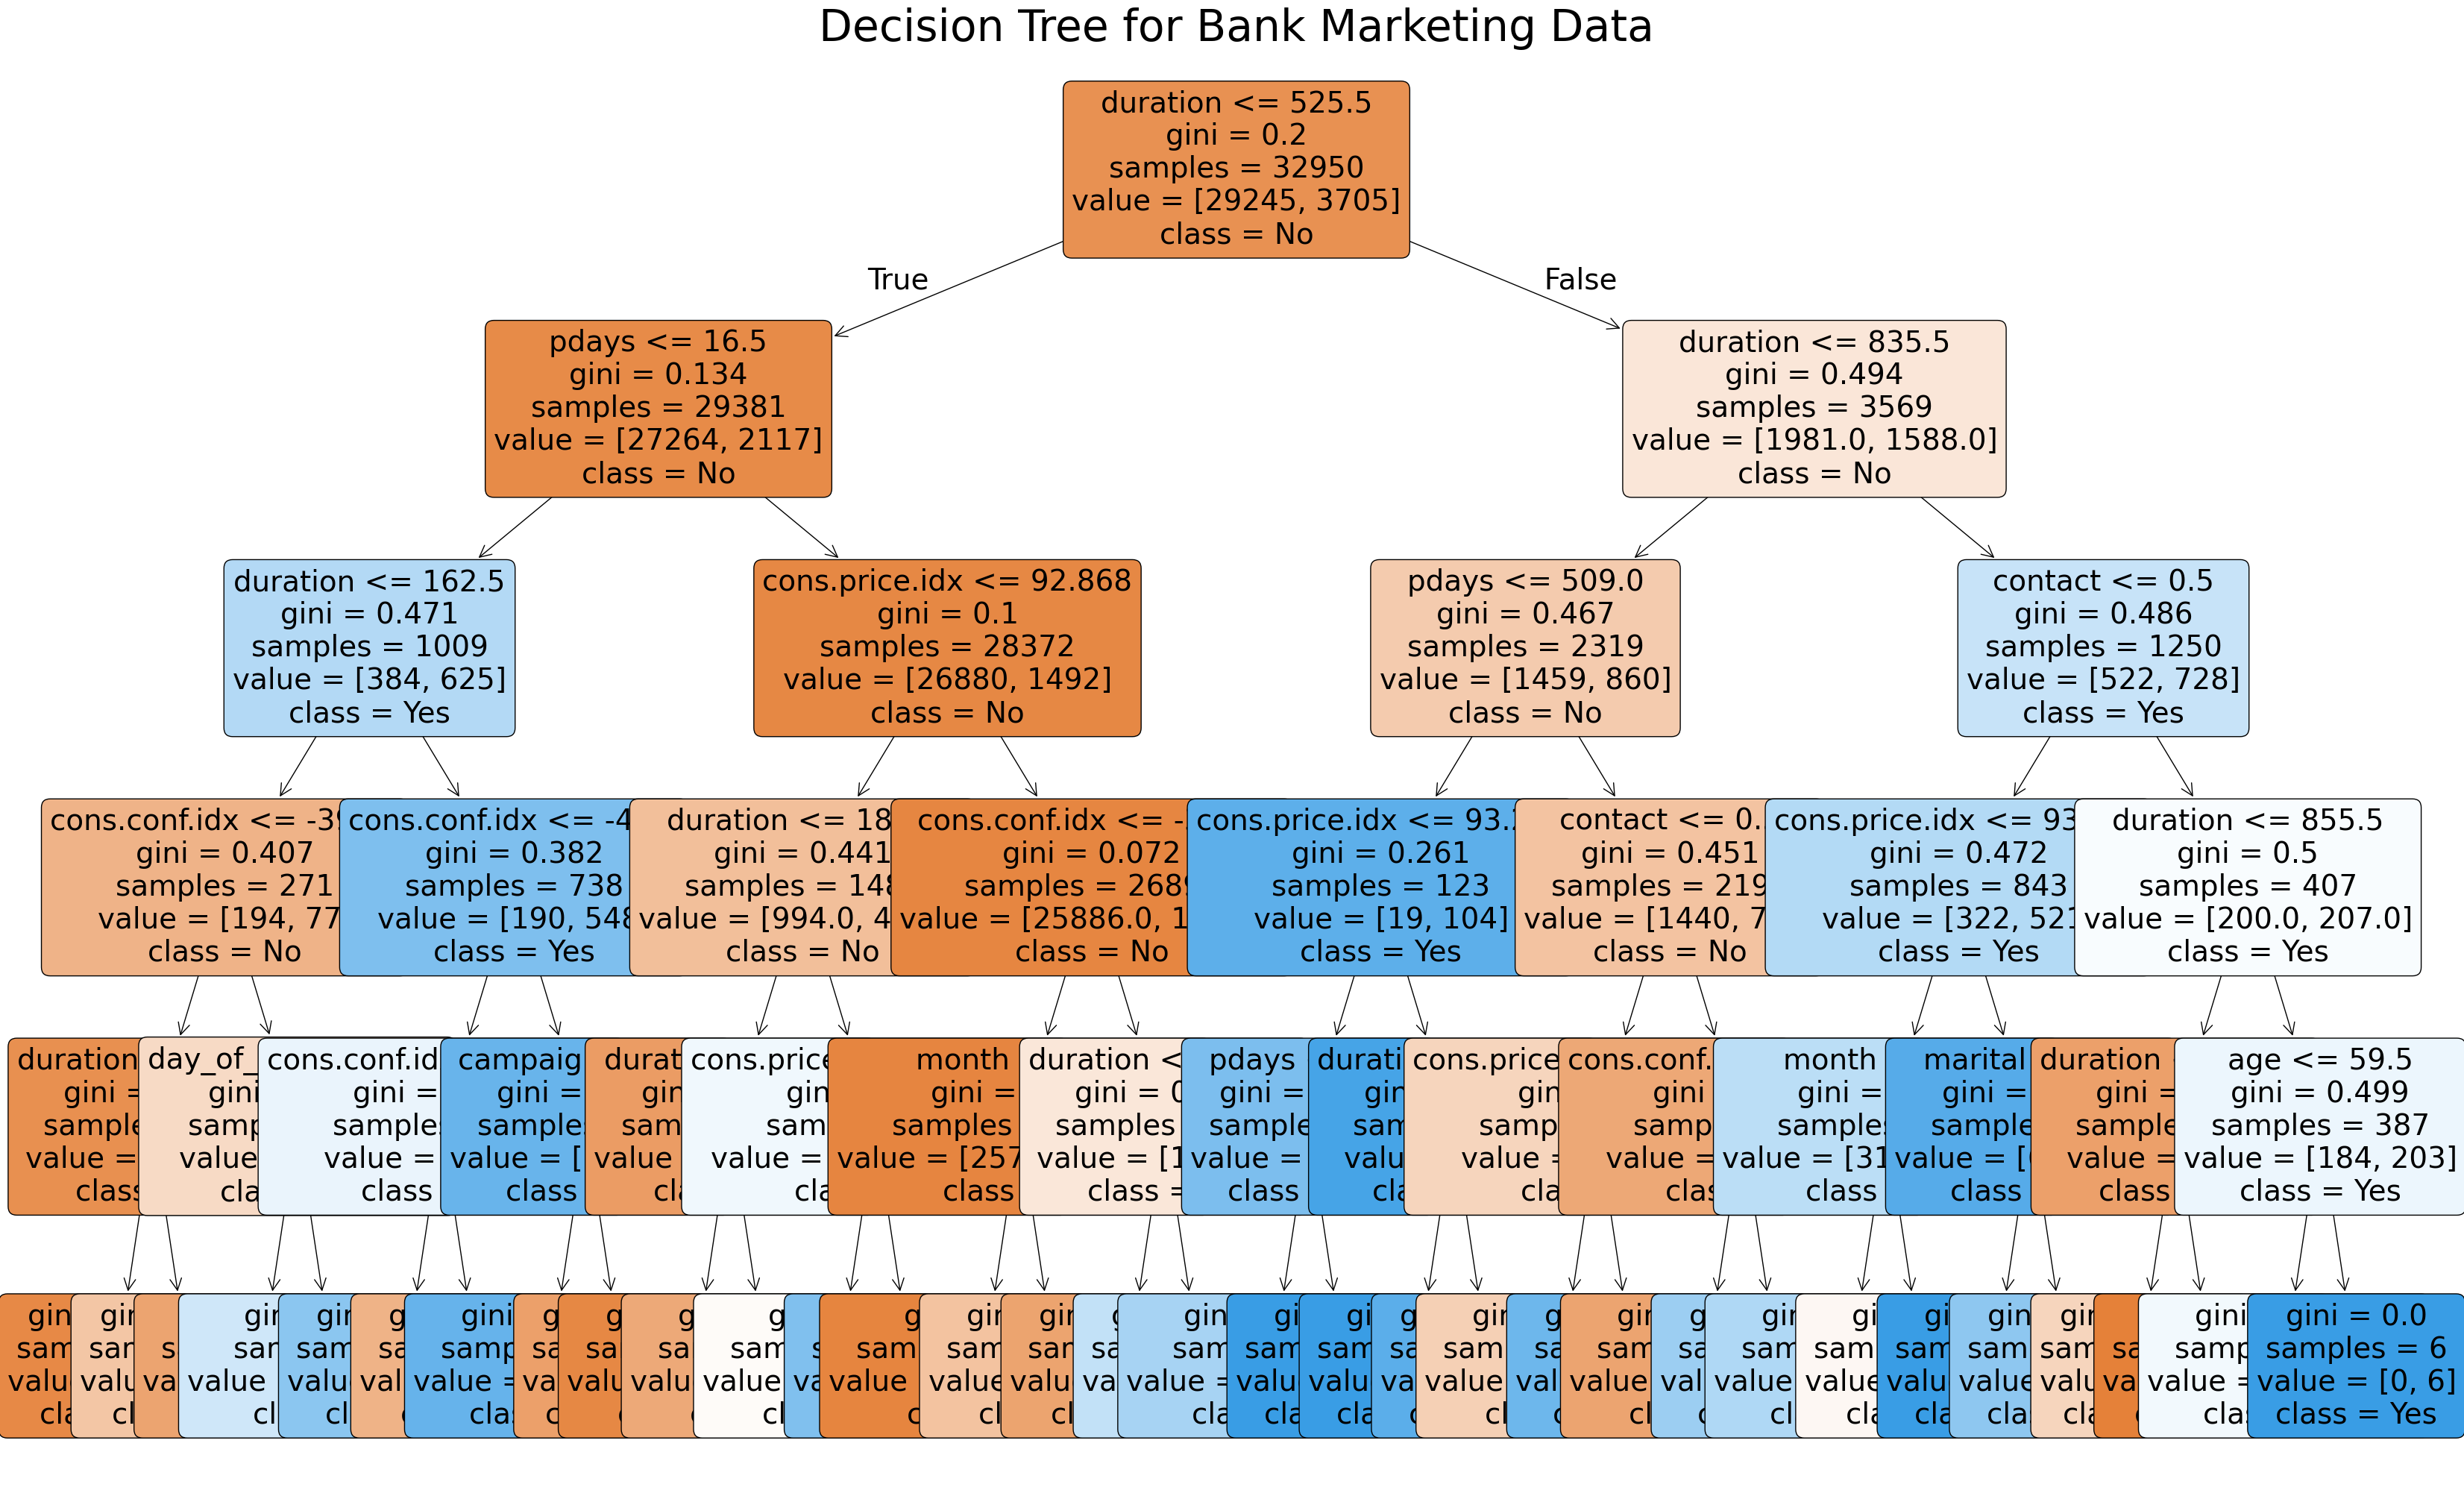

In [117]:
plt.figure(figsize=(40,25))
plot_tree(clf,feature_names=x.columns,class_names=['No','Yes'],filled=True,rounded=True,fontsize=28) # we can change font size as needed
plt.title("Decision Tree for Bank Marketing Data",fontsize=42)
plt.show()